In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df=pd.read_csv("/content/diamond.csv")

In [4]:
df.shape

(6000, 8)

In [10]:
df.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Carat Weight  6000 non-null   float64
 1   Cut           6000 non-null   object 
 2   Color         6000 non-null   object 
 3   Clarity       6000 non-null   object 
 4   Polish        6000 non-null   object 
 5   Symmetry      6000 non-null   object 
 6   Report        6000 non-null   object 
 7   Price         6000 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 375.1+ KB


In [6]:
df.isnull().sum()


,0
Carat Weight,0
Cut,0
Color,0
Clarity,0
Polish,0
Symmetry,0
Report,0
Price,0


In [8]:
df.duplicated().sum()

83

In [39]:
categorical_cols = []
for col in df.columns:
    if df[col].nunique() <= 9:  # Consider columns with 9 or fewer unique values
        categorical_cols.append(col)

print("Categorical Columns:", categorical_cols)
print("Total number of categorical columns:", len(categorical_cols))


Categorical Columns: ['Cut', 'Color', 'Clarity', 'Polish', 'Symmetry', 'Report']
Total number of categorical columns: 6


In [40]:
numerical_cols = []
for col in df.columns:
    if df[col].nunique() >= 9:  # Consider columns with at least 9 unique values
        numerical_cols.append(col)

print("Numerical Columns (with at least 9 unique values):", numerical_cols)
print("Total number of numerical columns (with at least 9 unique values):", len(numerical_cols))


Numerical Columns (with at least 9 unique values): ['Carat Weight', 'Price']
Total number of numerical columns (with at least 9 unique values): 2


In [36]:
# Find duplicate rows
duplicates = df[df.duplicated(keep=False)]  # Set keep=False to mark all duplicates

# Display duplicates
duplicates


,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
72,1.50,Very Good,G,SI1,VG,VG,GIA,10019
85,1.10,Ideal,H,VS2,VG,VG,GIA,6387
107,1.54,Ideal,I,VS2,ID,ID,AGSL,9998
314,1.14,Signature-Ideal,H,SI1,ID,ID,AGSL,7079
320,1.06,Signature-Ideal,G,VS1,ID,ID,AGSL,8093
...,...,...,...,...,...,...,...,...
5874,0.91,Ideal,I,VS2,ID,ID,AGSL,4199
5923,1.11,Ideal,I,SI1,EX,EX,GIA,4771
5948,1.00,Very Good,E,VVS1,VG,G,GIA,9092
5957,2.02,Ideal,G,SI1,EX,EX,GIA,21167


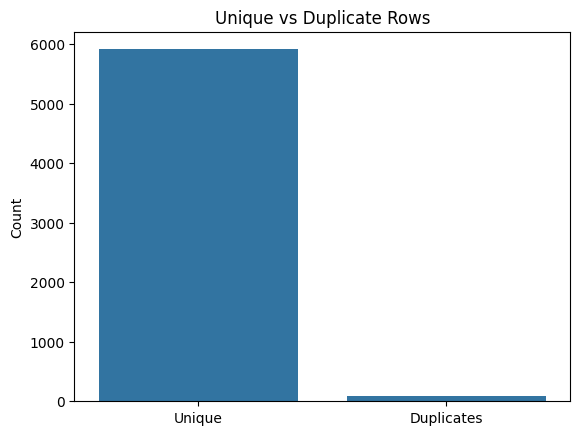

In [17]:
import seaborn as sns

# Count the number of duplicates and unique rows
duplicate_count = df.duplicated().sum()
unique_count = len(df) - duplicate_count

# Create a bar plot
sns.barplot(x=["Unique", "Duplicates"], y=[unique_count, duplicate_count])
plt.title("Unique vs Duplicate Rows")
plt.ylabel("Count")
plt.show()


we drop duplicates

In [37]:
df=df.drop_duplicates()

In [41]:
# Function to calculate outliers using IQR
def calculate_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return len(outliers)
# Calculate outliers for each numerical column
outlier_counts = {}
for col in numerical_cols:
    outlier_counts[col] = calculate_outliers(df[col])

# Print outlier counts
print("Outlier Counts:")
for col, count in outlier_counts.items():
    print(f"{col}: {count} outliers")

Outlier Counts:
Carat Weight: 92 outliers
Price: 367 outliers


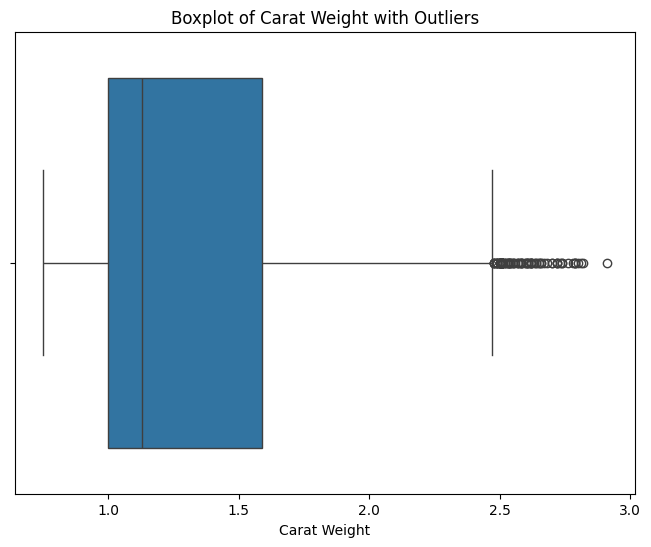

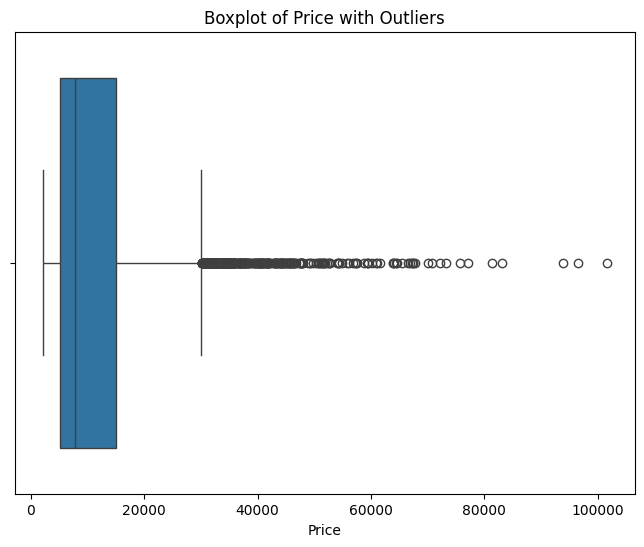

In [22]:
# prompt: boxplot for outiners

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'numerical_cols' and 'df' are defined from the previous code

for col in numerical_cols:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col} with Outliers')
    plt.show()

In [23]:
df.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [ ]:
df.columns

Index(['Carat Weight', 'Cut', 'Color', 'Clarity', 'Polish', 'Symmetry',
       'Report', 'Price'],
      dtype='object')

In [42]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
data_encoded = df.copy()

for col in ['Cut', 'Color', 'Clarity', 'Polish', 'Symmetry', 'Report']:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(df[col])
    label_encoders[col] = le
print(data_encoded)

      Carat Weight  Cut  Color  Clarity  Polish  Symmetry  Report  Price
0             1.10    2      4        2       3         0       1   5169
1             0.83    2      4        3       2         2       0   3470
2             0.85    2      4        2       0         0       1   3183
3             0.91    2      1        2       3         3       1   4370
4             0.83    2      3        2       0         0       1   3171
...            ...  ...    ...      ...     ...       ...     ...    ...
5995          1.03    2      0        2       0         0       1   6250
5996          1.00    4      0        2       3         3       1   5328
5997          1.02    2      0        2       0         0       1   6157
5998          1.27    3      3        3       0         0       1  11206
5999          2.19    2      1        3       0         0       1  30507

[5917 rows x 8 columns]


In [18]:
data_encoded.Clarity.unique()

array(['SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'IF', 'FL'], dtype=object)

In [19]:
# Custom mapping for diamond clarity grades
clarity_mapping = {
    'FL': 0,    # Flawless (best)
    'IF': 1,    # Internally Flawless
    'VVS1': 2,  # Very Very Slightly Included 1
    'VVS2': 3,  # Very Very Slightly Included 2
    'VS1': 4,   # Very Slightly Included 1
    'VS2': 5,   # Very Slightly Included 2
    'SI1': 6    # Slightly Included 1 (worst in this set)
}
# Apply the clarity mapping to the dataframe
data_encoded['clarity_encoded'] = data_encoded['Clarity'].map(clarity_mapping)

In [20]:
df.drop('Clarity', axis=1, inplace=True)

In [21]:
data_encoded.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,clarity_encoded
0,1.10,2,4,SI1,3,0,1,5169,6
1,0.83,2,4,VS1,2,2,0,3470,4
2,0.85,2,4,SI1,0,0,1,3183,6
3,0.91,2,1,SI1,3,3,1,4370,6
4,0.83,2,3,SI1,0,0,1,3171,6


In [43]:
data_encoded['Clarity'].value_counts()

,count
Clarity,
2,2022
4,1559
3,1172
6,659
5,282
1,219
0,4


In [56]:
df.columns

Index(['Carat Weight', 'Cut', 'Color', 'Clarity', 'Polish', 'Symmetry',
       'Report', 'Price'],
      dtype='object')

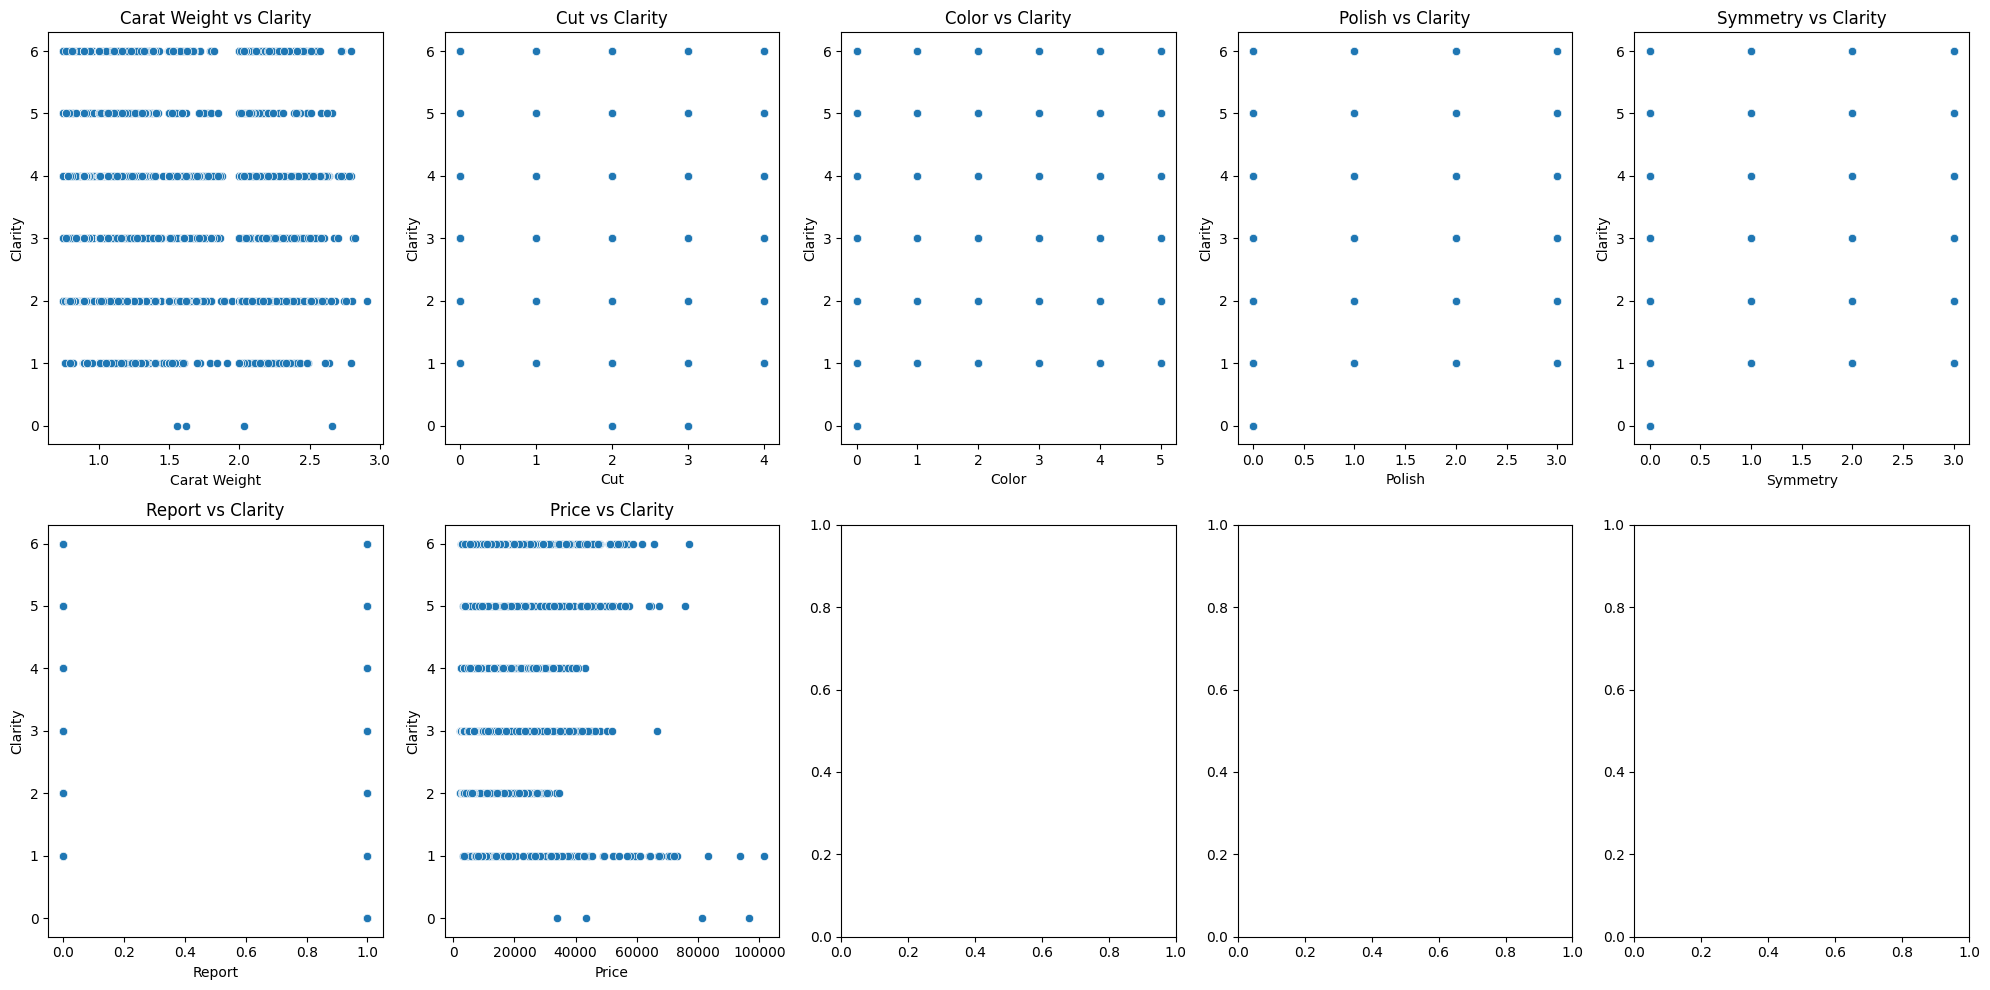

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Features to plot against 'clarity'
features = ['Carat Weight', 'Cut', 'Color', 'Polish', 'Symmetry',
       'Report', 'Price']

# Assuming your DataFrame is named data_encoded
# and clarity is now 'clarity_encoded'

# Set up the figure for a 2-row grid layout (e.g., 5 plots in the first row and 4 in the second)
fig, axes = plt.subplots(2, 5, figsize=(20, 10))  # Adjust the number of columns and rows as needed
axes = axes.flatten()  # Flatten the axes array to make it easier to index

# Loop through the features and plot
for i, feature in enumerate(features):
    # Using data_encoded and clarity_encoded column
    # Also checking if the feature column exists in data_encoded
    if feature in data_encoded.columns:
        sns.scatterplot(data=data_encoded, x=feature, y='Clarity', ax=axes[i])
        axes[i].set_title(f'{feature} vs Clarity')
    else:
        print(f"Feature '{feature}' not found in DataFrame")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

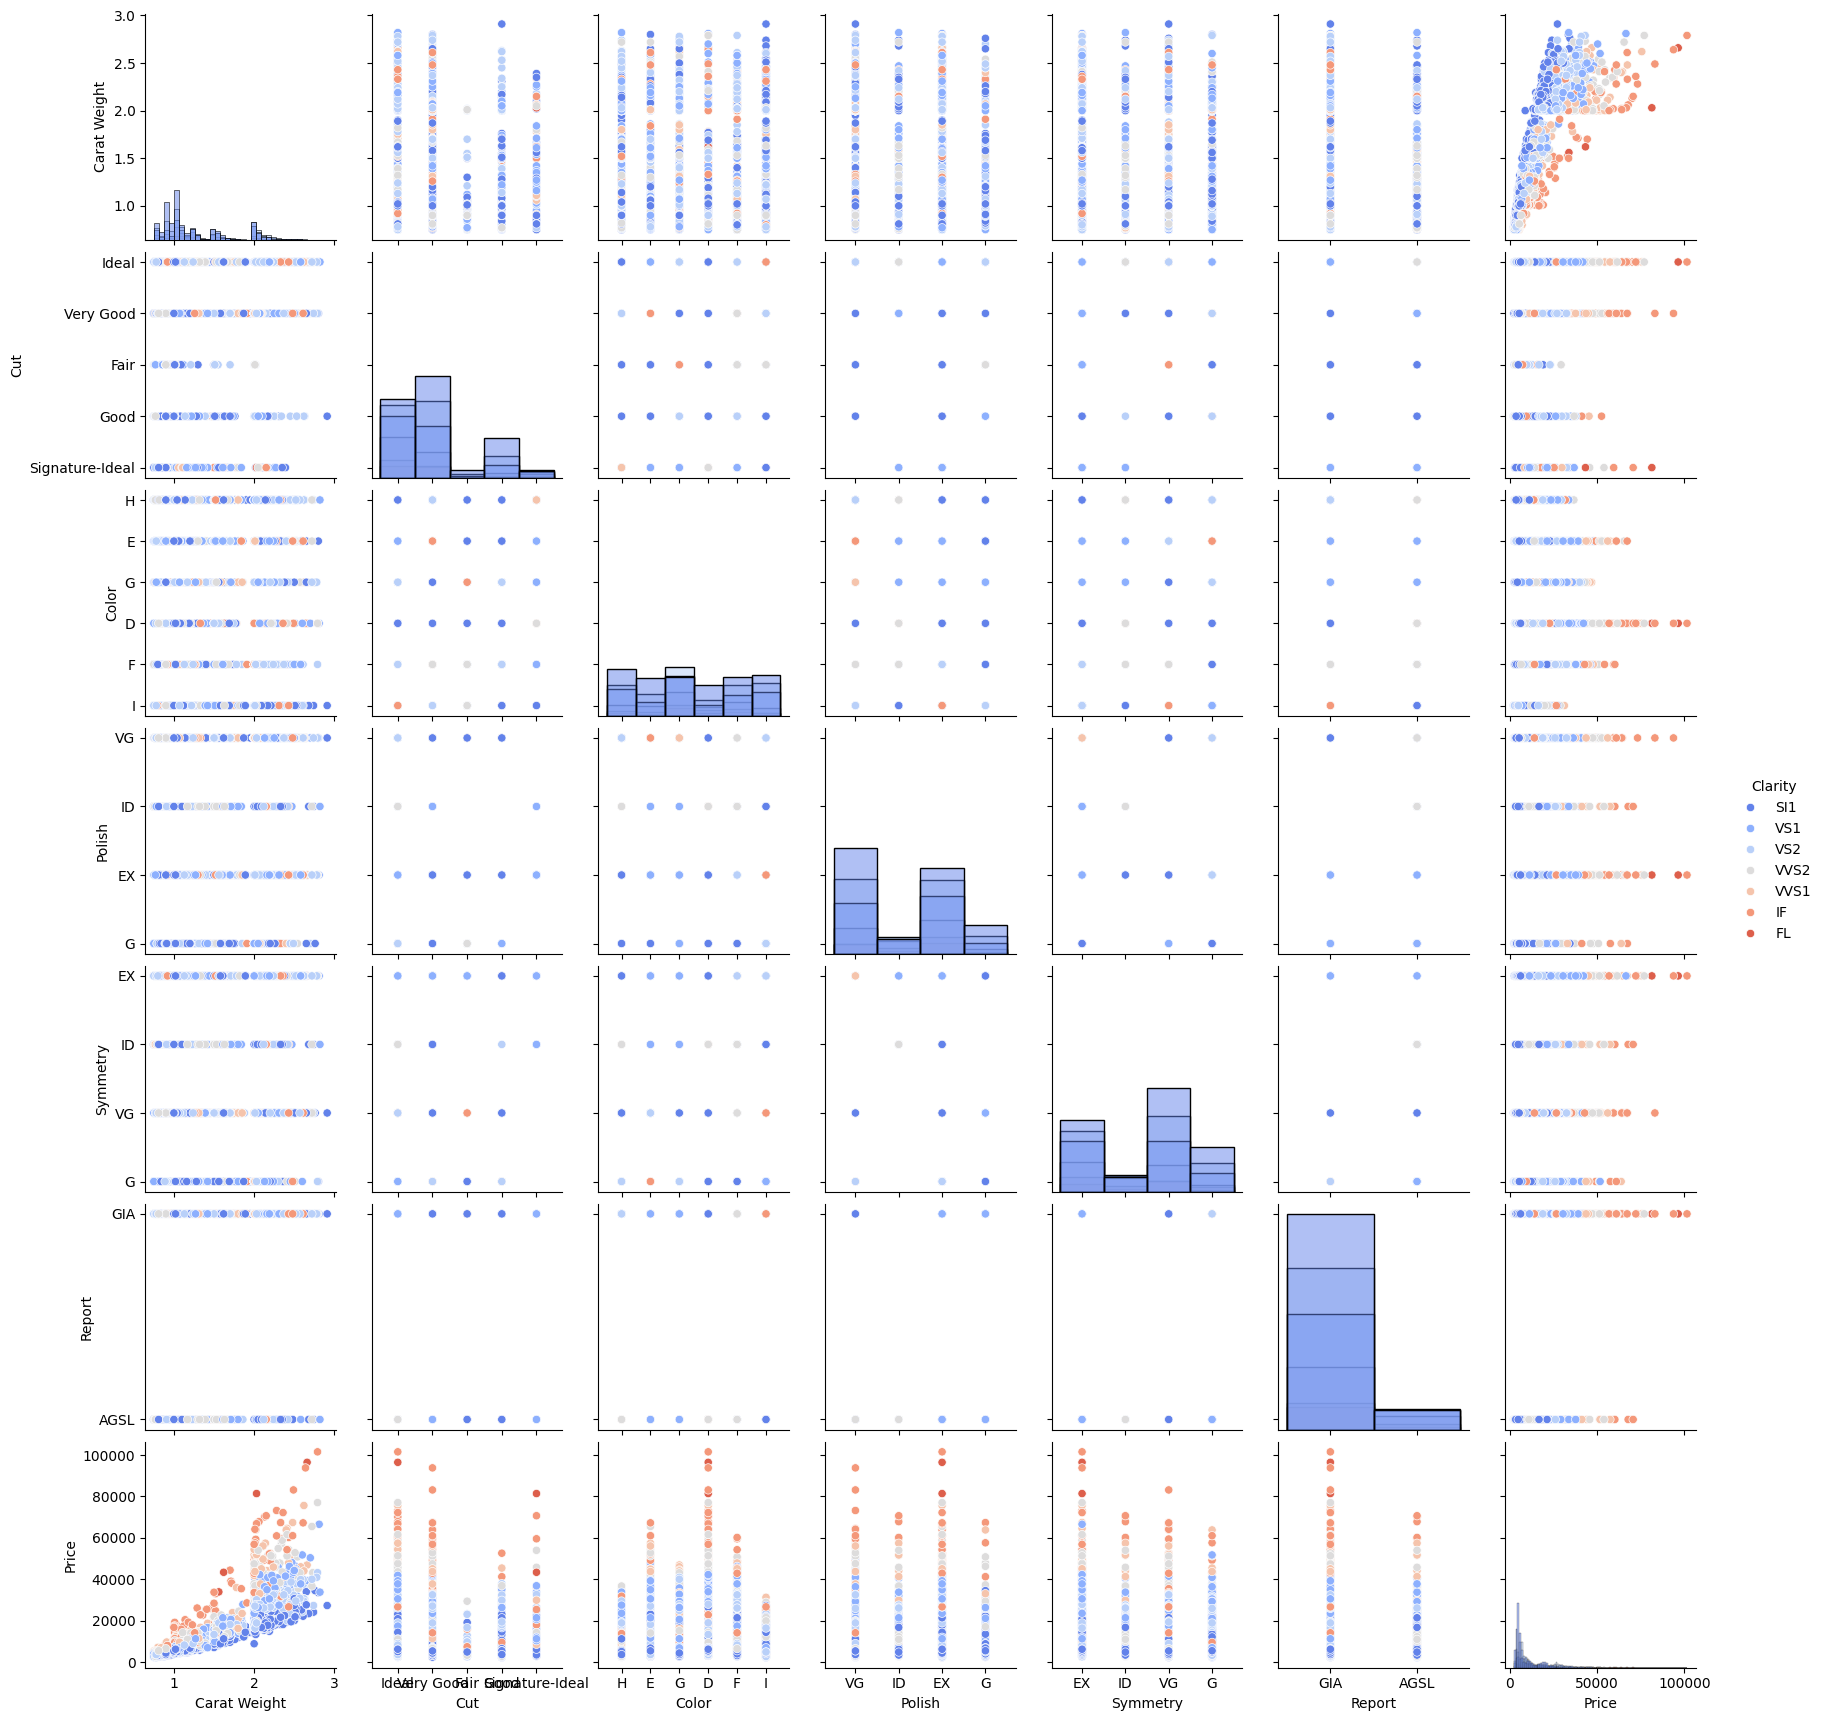

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# ... (Your existing code) ...

# Specify 'diag_kind' to handle categorical variables on the diagonal
sns.pairplot(
    df,
    hue='Clarity',
    vars=['Carat Weight', 'Cut', 'Color','Polish', 'Symmetry',
       'Report', 'Price'],
    palette='coolwarm',
    markers='o',
    diag_kind='hist'  # Change diag_kind to 'hist' or 'kde' if appropriate
)
plt.show()

In [44]:
X=data_encoded.drop(columns=['Clarity'])
y=data_encoded['Clarity']

In [45]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, k_neighbors=3)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Convert back to a DataFrame
X_balanced_df = pd.DataFrame(X_balanced, columns=X.columns)
y_balanced_df = pd.DataFrame(y_balanced, columns=['Clarity'])

# Combine the balanced features and target into one DataFrame
balanced_data = pd.concat([X_balanced_df, y_balanced_df], axis=1)


In [46]:
balanced_data['Clarity'].value_counts()

,count
Clarity,
2,2022
3,2022
4,2022
6,2022
5,2022
1,2022
0,2022


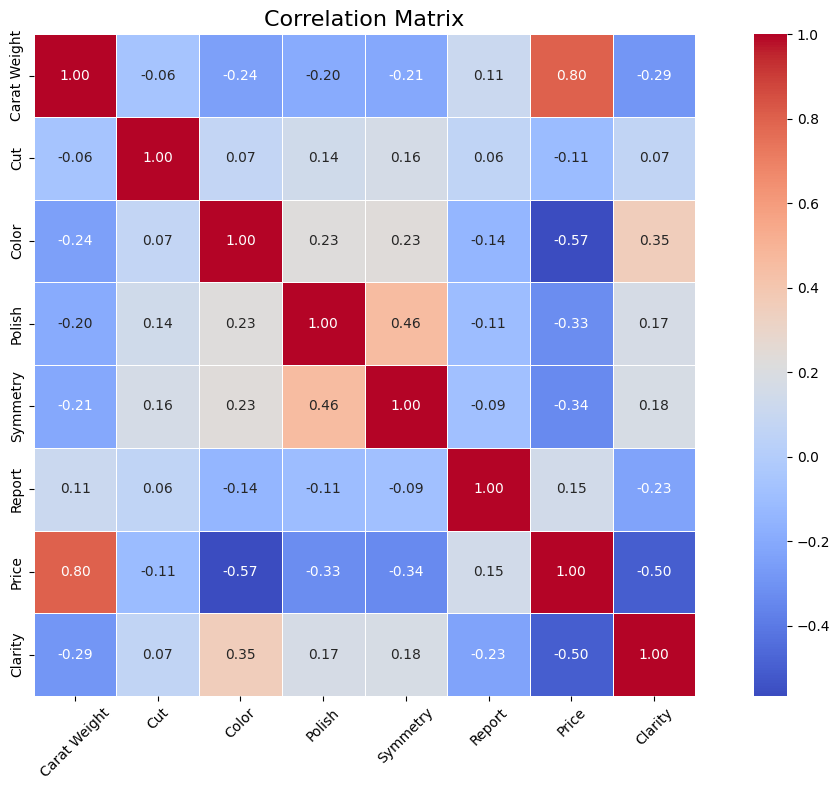

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = balanced_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,             # Annotate the correlation coefficients
    fmt=".2f",              # Format annotations to two decimal places
    cmap="coolwarm",        # Color map for heatmap
    cbar=True,              # Show color bar
    square=True,            # Force square cells
    linewidths=0.5,         # Add lines between cells
    annot_kws={"size": 10}  # Annotation font size
)
plt.title("Correlation Matrix", fontsize=16)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


In [47]:
# Step 3: Features and target
X = data_encoded.drop(columns=['Clarity'])
y = data_encoded['Clarity']

In [56]:
!pip install scikit-learn==1.0.2
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 44.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.29.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.0.2 which is incompatible.
mlxtend 0.23.3 requires scikit-learn>=1.3.1, but you have scikit-learn 1.0.2 which is incompatible.


In [48]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced)

# Class balancing
scale_pos_weight = len(y_balanced[y_balanced == 0]) / len(y_balanced[y_balanced == 1])

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [9],
    'learning_rate': [0.1, 0.05, 0.01]
}

# Initialize XGBClassifier without scale_pos_weight and use_label_encoder
xgb_classifier = XGBClassifier(
    random_state=42,
    objective='binary:logistic',
    eval_metric="aucpr"
)

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_classifier,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=2
)

grid_search.fit(X_train, y_train, sample_weight=None)

# Best Parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the final model with best parameters
best_model = grid_search.best_estimator_

# Fit the model using scale_pos_weight during training
best_model.fit(X_train, y_train, sample_weight=[scale_pos_weight if y == 1 else 1 for y in y_train])

# Predict on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ....learning_rate=0.1, max_depth=9, n_estimators=50; total time=   0.8s
[CV] END ....learning_rate=0.1, max_depth=9, n_estimators=50; total time=   0.8s
[CV] END ....learning_rate=0.1, max_depth=9, n_estimators=50; total time=   0.8s
[CV] END ....learning_rate=0.1, max_depth=9, n_estimators=50; total time=   0.8s
[CV] END ....learning_rate=0.1, max_depth=9, n_estimators=50; total time=   0.7s
[CV] END ...learning_rate=0.1, max_depth=9, n_estimators=100; total time=   1.4s
[CV] END ...learning_rate=0.1, max_depth=9, n_estimators=100; total time=   1.4s
[CV] END ...learning_rate=0.1, max_depth=9, n_estimators=100; total time=   1.4s
[CV] END ...learning_rate=0.1, max_depth=9, n_estimators=100; total time=   3.5s
[CV] END ...learning_rate=0.1, max_depth=9, n_estimators=100; total time=   1.4s
[CV] END ...learning_rate=0.1, max_depth=9, n_estimators=150; total time=   2.0s
[CV] END ...learning_rate=0.1, max_depth=9, n_es

In [52]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import classification_report, balanced_accuracy_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced)

# Parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [6, 8],
    'learning_rate': [0.1, 0.05, 0.01],
    'num_leaves': [31, 50],
    'scale_pos_weight': [1, 5]
}

# Perform RandomizedSearchCV
randomized_search = RandomizedSearchCV(
    estimator=LGBMClassifier(random_state=42),
    param_distributions=param_grid,
    scoring='balanced_accuracy',
    cv=5,
    verbose=2,
    n_jobs=-1,
    n_iter=30,
    random_state=42
)
randomized_search.fit(X_train, y_train)

# Best parameters and model
best_params = randomized_search.best_params_
print(f"Best Parameters: {best_params}")

best_lgb_model = randomized_search.best_estimator_

# Predictions and evaluation
y_pred = best_lgb_model.predict(X_test)

print("\nBalanced Accuracy Score:")
print(balanced_accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001693 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 531
[LightGBM] [Info] Number of data points in the train set: 11323, number of used features: 7
[LightGBM] [Info] Start training from score -1.945645
[LightGBM] [Info] Start training from score -1.945645
[LightGBM] [Info] Start training from score -1.945645
[LightGBM] [Info] Start training from score -1.946263
[LightGBM] [Info] Start training from score -1.946263
[LightGBM] [Info] Start training from score -1.945645
[LightGBM] [Info] Start training from score -1.946263
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Define a reduced parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize a Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,
                                   n_iter=50, cv=3, n_jobs=-1, verbose=2, scoring='accuracy', random_state=42)

# Fit RandomizedSearchCV on training data
random_search.fit(X_train, y_train)

# Get the best parameters and best model
best_rf = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

# Evaluate the best model
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print results
print(f"Test Set Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None, 'bootstrap': False}
Test Set Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       411
           1       0.88      0.92      0.90       412
           2       0.74      0.83      0.78       412
           3       0.58      0.54      0.56       412
           4       0.58      0.53      0.55       412
           5       0.78      0.83      0.81       412
           6       0.68      0.64      0.66       412

    accuracy                           0.75      2883
   macro avg       0.75      0.75      0.75      2883
weighted avg       0.75      0.75      0.75      2883



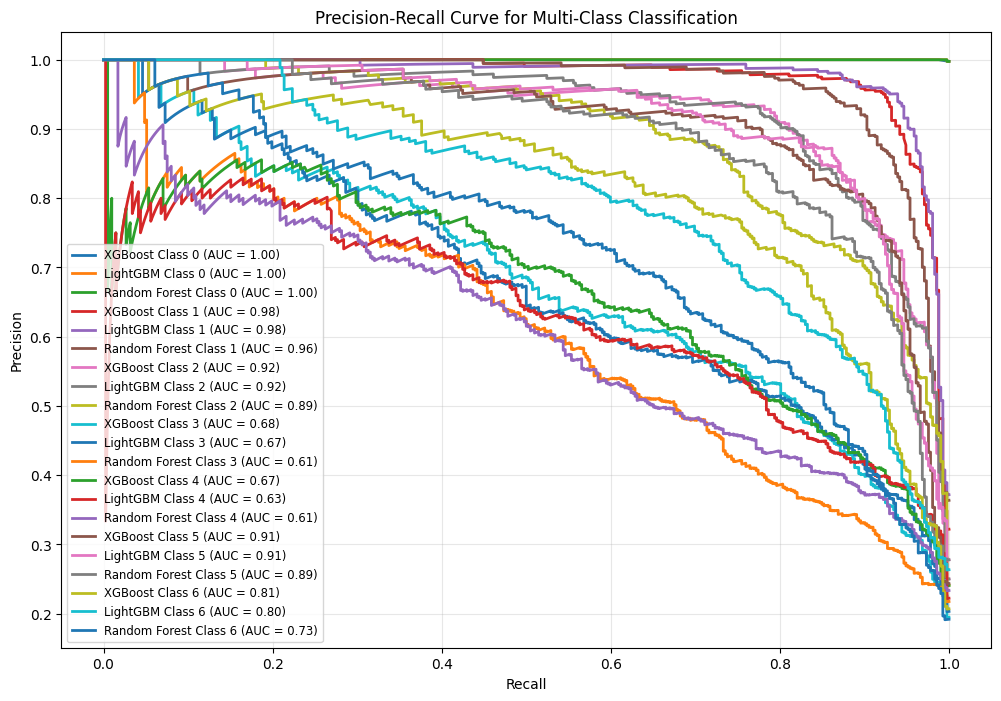

In [ ]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Assuming y_test is the true labels and model predictions are probabilities
# Ensure y_test is binarized for multi-class (e.g., [0, 1, 2] -> [[1, 0, 0], [0, 1, 0], [0, 0, 1]])
classes = list(set(y_test))  # Unique class labels
y_test_binarized = label_binarize(y_test, classes=classes)

# Prediction probabilities from models (shape: n_samples x n_classes)
xgb_predictions_prob = best_model.predict_proba(X_test)
lgbm_predictions_prob = best_lgb_model.predict_proba(X_test)
rf_predictions_prob = best_rf.predict_proba(X_test)

# Plot Precision-Recall curves for each class
plt.figure(figsize=(12, 8))

for i, class_label in enumerate(classes):
    # XGBoost
    precision_xgb, recall_xgb, _ = precision_recall_curve(y_test_binarized[:, i], xgb_predictions_prob[:, i])
    pr_auc_xgb = auc(recall_xgb, precision_xgb)
    plt.plot(recall_xgb, precision_xgb, lw=2, label=f'XGBoost Class {class_label} (AUC = {pr_auc_xgb:.2f})')

    # LightGBM
    precision_lgbm, recall_lgbm, _ = precision_recall_curve(y_test_binarized[:, i], lgbm_predictions_prob[:, i])
    pr_auc_lgbm = auc(recall_lgbm, precision_lgbm)
    plt.plot(recall_lgbm, precision_lgbm, lw=2, label=f'LightGBM Class {class_label} (AUC = {pr_auc_lgbm:.2f})')

    # Random Forest
    precision_rf, recall_rf, _ = precision_recall_curve(y_test_binarized[:, i], rf_predictions_prob[:, i])
    pr_auc_rf = auc(recall_rf, precision_rf)
    plt.plot(recall_rf, precision_rf, lw=2, label=f'Random Forest Class {class_label} (AUC = {pr_auc_rf:.2f})')

# Add labels, title, and legend
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Multi-Class Classification')
plt.legend(loc='best', fontsize='small')
plt.grid(alpha=0.3)
plt.show()

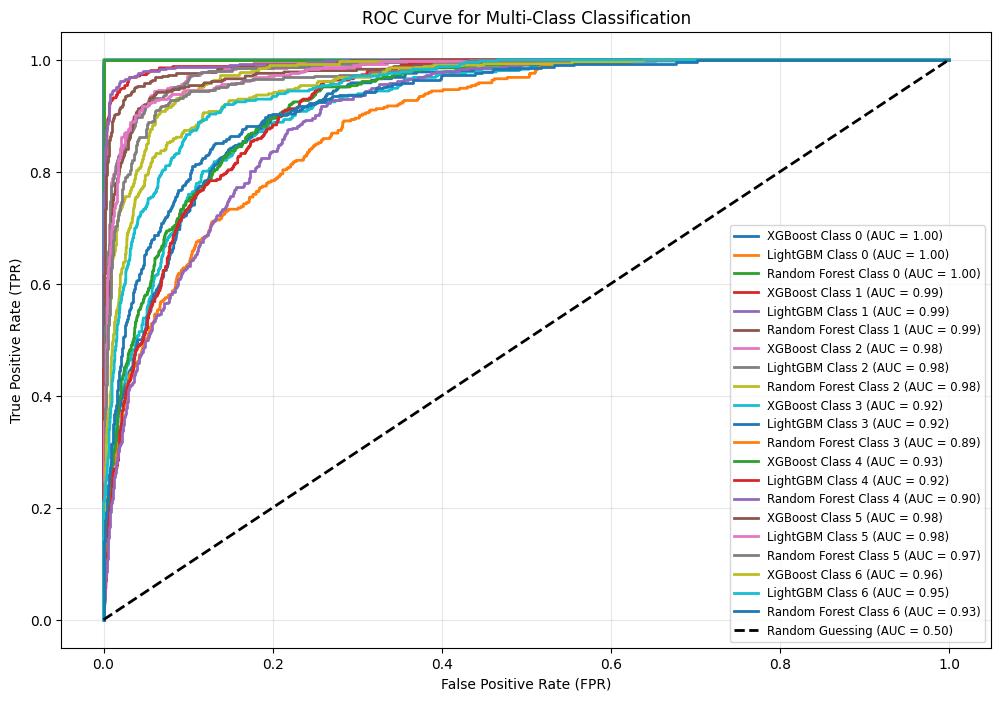

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Assuming y_test is the true labels and model predictions are probabilities
# Ensure y_test is binarized for multi-class (e.g., [0, 1, 2] -> [[1, 0, 0], [0, 1, 0], [0, 0, 1]])
classes = list(set(y_test))  # Unique class labels
y_test_binarized = label_binarize(y_test, classes=classes)

# Prediction probabilities from models (shape: n_samples x n_classes)
xgb_predictions_prob = best_model.predict_proba(X_test)
lgbm_predictions_prob = best_lgb_model.predict_proba(X_test)
rf_predictions_prob = best_rf.predict_proba(X_test)

# Plot ROC curves for each class
plt.figure(figsize=(12, 8))

for i, class_label in enumerate(classes):
    # XGBoost
    fpr_xgb, tpr_xgb, _ = roc_curve(y_test_binarized[:, i], xgb_predictions_prob[:, i])
    roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
    plt.plot(fpr_xgb, tpr_xgb, lw=2, label=f'XGBoost Class {class_label} (AUC = {roc_auc_xgb:.2f})')

    # LightGBM
    fpr_lgbm, tpr_lgbm, _ = roc_curve(y_test_binarized[:, i], lgbm_predictions_prob[:, i])
    roc_auc_lgbm = auc(fpr_lgbm, tpr_lgbm)
    plt.plot(fpr_lgbm, tpr_lgbm, lw=2, label=f'LightGBM Class {class_label} (AUC = {roc_auc_lgbm:.2f})')

    # Random Forest
    fpr_rf, tpr_rf, _ = roc_curve(y_test_binarized[:, i], rf_predictions_prob[:, i])
    roc_auc_rf = auc(fpr_rf, tpr_rf)
    plt.plot(fpr_rf, tpr_rf, lw=2, label=f'Random Forest Class {class_label} (AUC = {roc_auc_rf:.2f})')

# Add labels, title, and legend
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Guessing (AUC = 0.50)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc='best', fontsize='small')
plt.grid(alpha=0.3)
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Carat Weight  6000 non-null   float64
 1   Cut           6000 non-null   object 
 2   Color         6000 non-null   object 
 3   Clarity       6000 non-null   object 
 4   Polish        6000 non-null   object 
 5   Symmetry      6000 non-null   object 
 6   Report        6000 non-null   object 
 7   Price         6000 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 375.1+ KB


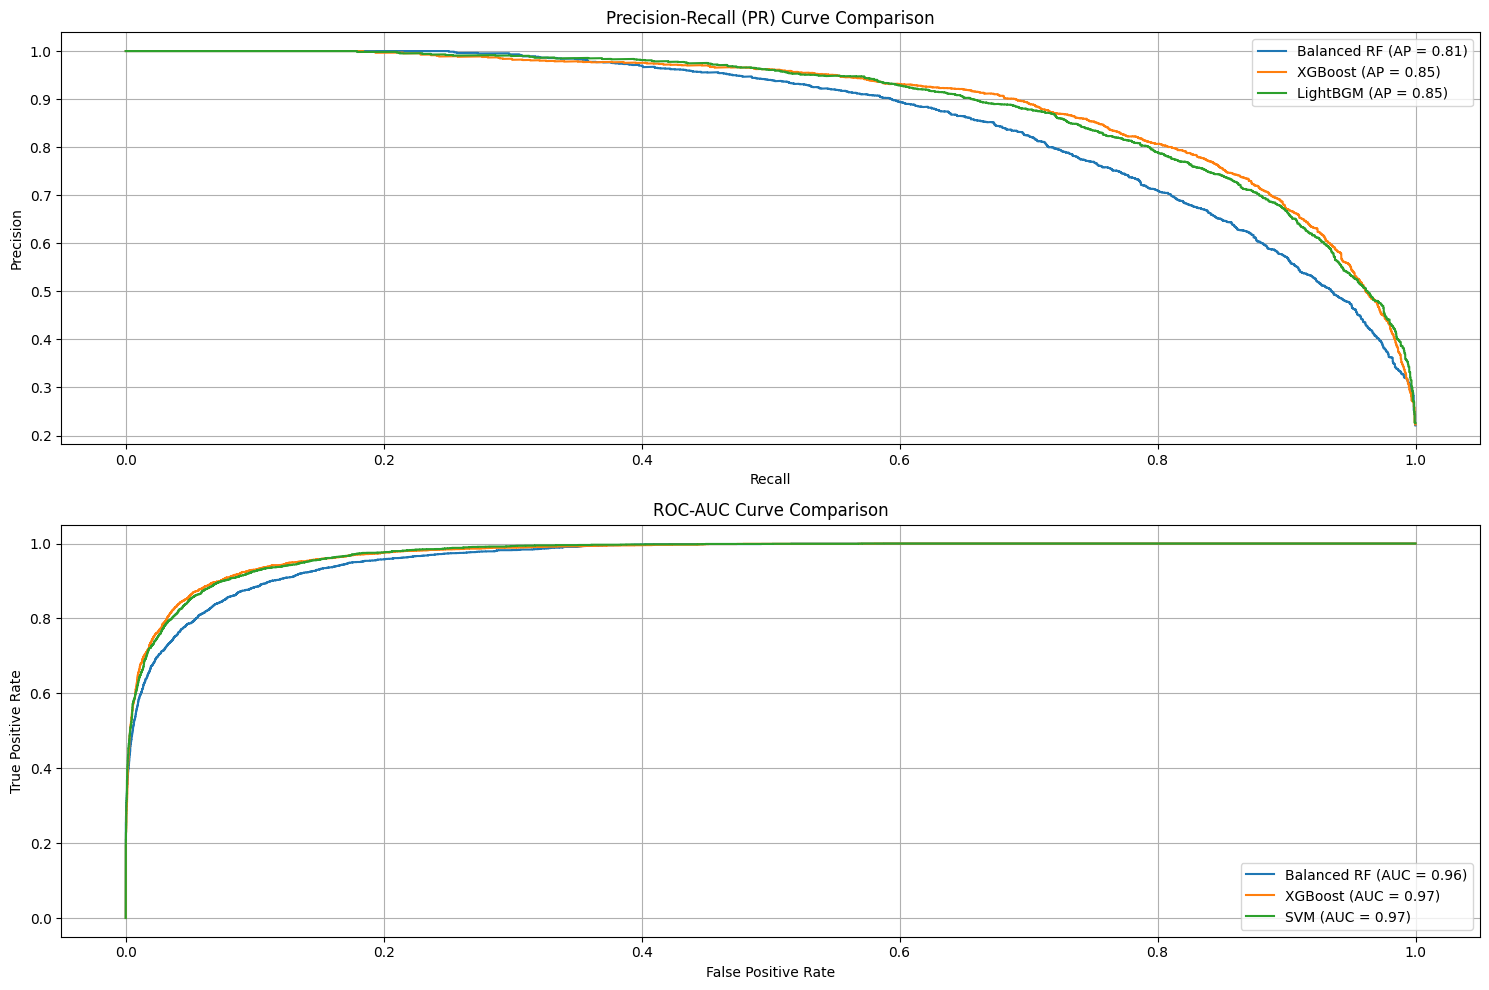

In [ ]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc, average_precision_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize  # Import label_binarize

# Initialize figure for PR and ROC-AUC curves
plt.figure(figsize=(15, 10))

# *Subplot for PR Curves*
plt.subplot(2, 1, 1)
plt.title("Precision-Recall (PR) Curve Comparison")

# Binarize y_test for multi-class calculations
y_test_bin = label_binarize(y_test, classes=list(set(y_test))) # Define y_test_bin

for model_name, model in [
    ("Balanced RF", best_rf),
    ("XGBoost", best_model),
    ("LightBGM", best_lgb_model)
]:
    # Get prediction probabilities or decision scores
    if hasattr(model, "predict_proba"):  # For models with predict_proba
        y_scores = model.predict_proba(X_test)
    elif hasattr(model, "decision_function"):  # For models with decision_function
        y_scores = model.decision_function(X_test)
    else:
        raise AttributeError(f"Model {model_name} does not support probability or decision function output.")

    # Calculate average precision across all classes
    avg_precision = average_precision_score(y_test_bin, y_scores, average="macro")

    # Compute a macro-average PR curve
    precision, recall, _ = precision_recall_curve(y_test_bin.ravel(), y_scores.ravel())
    plt.plot(recall, precision, label=f"{model_name} (AP = {avg_precision:.2f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="best")
plt.grid(True)

# *Subplot for ROC-AUC Curves*
plt.subplot(2, 1, 2)
plt.title("ROC-AUC Curve Comparison")

for model_name, model in [
    ("Balanced RF", best_rf),
    ("XGBoost", best_model),
    ("SVM", best_lgb_model)
]:
    # Get prediction probabilities or decision scores
    if hasattr(model, "predict_proba"):  # For models with predict_proba
        y_scores = model.predict_proba(X_test)
    elif hasattr(model, "decision_function"):  # For models with decision_function
        y_scores = model.decision_function(X_test)
    else:
        raise AttributeError(f"Model {model_name} does not support probability or decision function output.")

    # Compute a macro-average ROC curve
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_scores.ravel()) # Use y_test_bin here as well
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.grid(True)

plt.tight_layout()
plt.show()

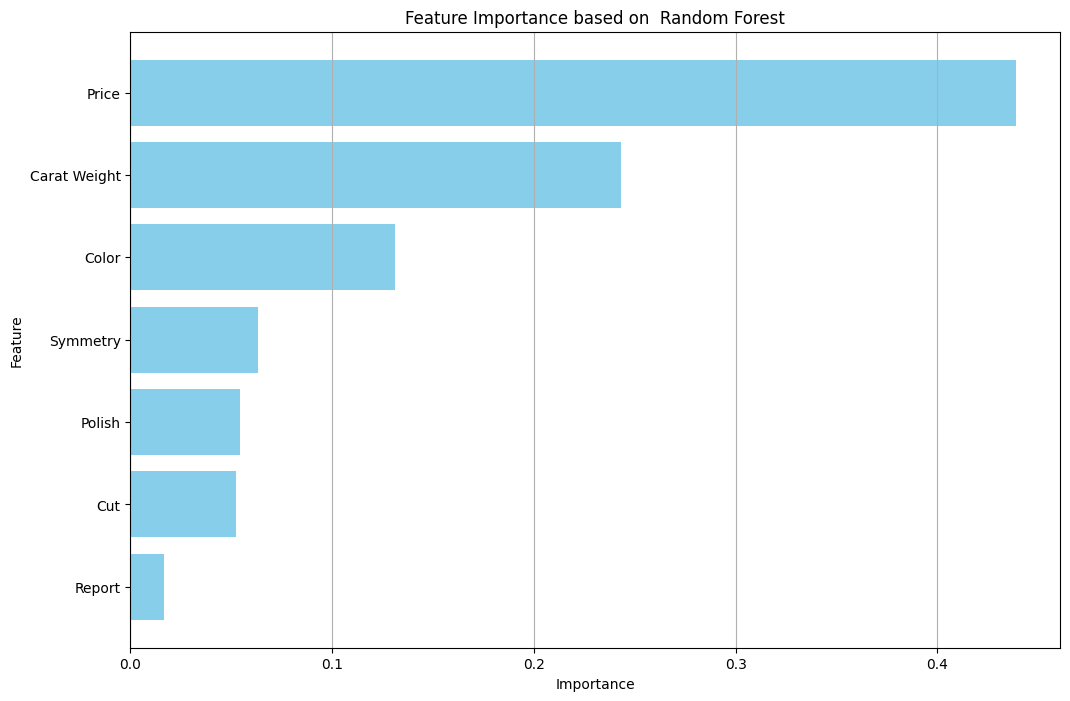

Top 10 Features based on Balanced Random Forest Feature Importance:
        Feature  Importance
6         Price    0.439037
0  Carat Weight    0.242965
2         Color    0.131172
4      Symmetry    0.063402
3        Polish    0.054428
1           Cut    0.052204
5        Report    0.016792


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming brf_model is a trained BalancedRandomForestClassifier and X_train_resampled has feature names

# Get the feature importances
feature_importance = best_rf.feature_importances_

# Create a DataFrame to hold feature names and their importance
importance_df = pd.DataFrame({
    'Feature': X_train.columns,  # X_train_resampled is the DataFrame with feature names
    'Importance': feature_importance
})

# Sort by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Get the top 10 features
top_10_features = importance_df.head(10)

# Plot top 10 feature importance
plt.figure(figsize=(12, 8))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='skyblue')
plt.title("Feature Importance based on  Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.gca().invert_yaxis()  # Display most important feature at the top
plt.grid(axis='x')
plt.show()

# Print the top 10 features
print("Top 10 Features based on Balanced Random Forest Feature Importance:")
print(top_10_features)

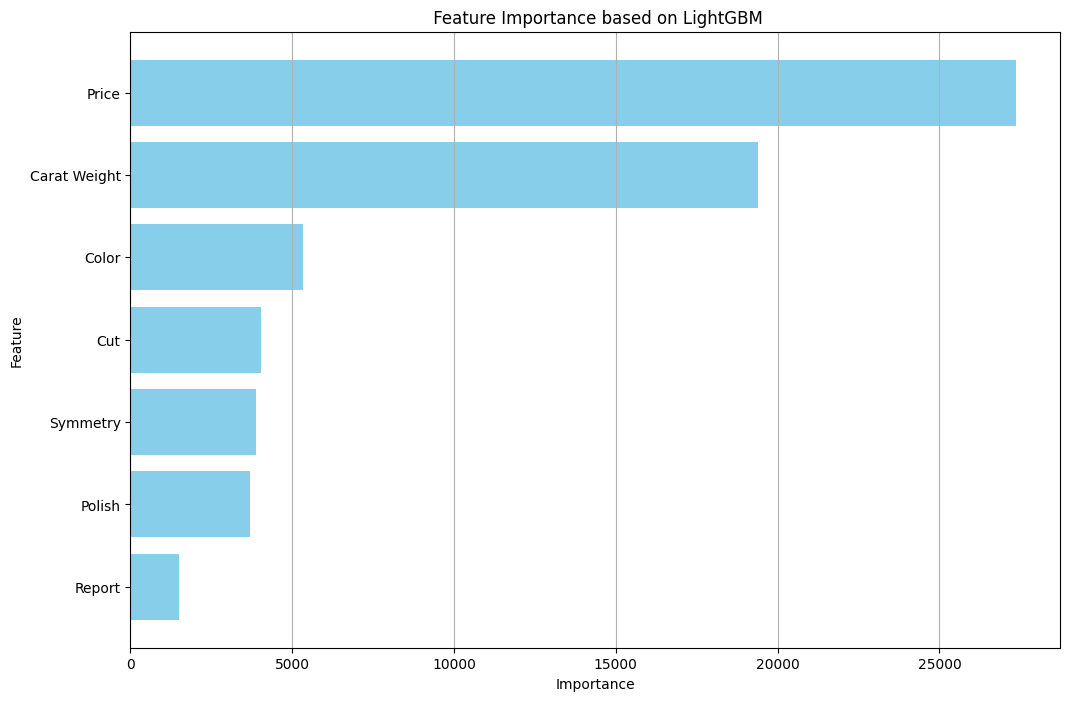

Feature Importance based on LightGBM
        Feature  Importance
6         Price       27370
0  Carat Weight       19397
2         Color        5347
1           Cut        4028
4      Symmetry        3870
3        Polish        3701
5        Report        1488


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming brf_model is a trained BalancedRandomForestClassifier and X_train_resampled has feature names

# Get the feature importances
feature_importance = best_lgb_model.feature_importances_

# Create a DataFrame to hold feature names and their importance
importance_df = pd.DataFrame({
    'Feature': X_train.columns,  # X_train_resampled is the DataFrame with feature names
    'Importance': feature_importance
})

# Sort by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Get the top 10 features
top_10_features = importance_df.head(10)

# Plot top 10 feature importance
plt.figure(figsize=(12, 8))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='skyblue')
plt.title(" Feature Importance based on LightGBM")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.gca().invert_yaxis()  # Display most important feature at the top
plt.grid(axis='x')
plt.show()

# Print the top 10 features
print("Feature Importance based on LightGBM")
print(top_10_features)

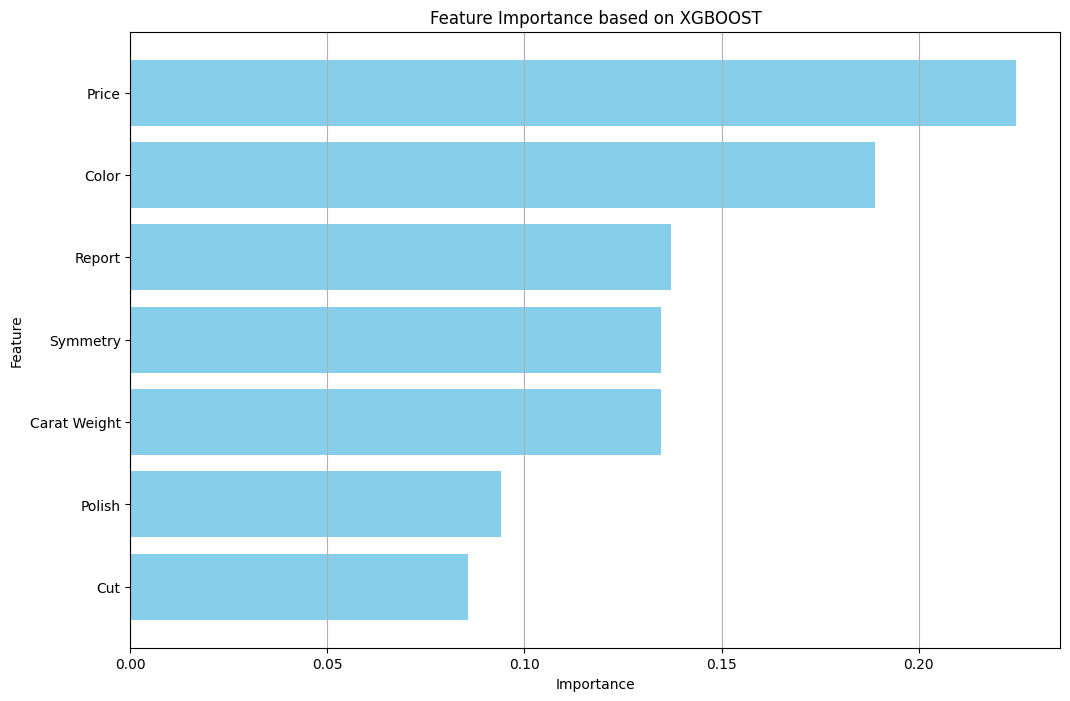

Feature Importance based on XGBOOST
        Feature  Importance
6         Price    0.224762
2         Color    0.188996
5        Report    0.137090
4      Symmetry    0.134709
0  Carat Weight    0.134653
3        Polish    0.094031
1           Cut    0.085759


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming brf_model is a trained BalancedRandomForestClassifier and X_train_resampled has feature names

# Get the feature importances
feature_importance = best_model.feature_importances_

# Create a DataFrame to hold feature names and their importance
importance_df = pd.DataFrame({
    'Feature': X_train.columns,  # X_train_resampled is the DataFrame with feature names
    'Importance': feature_importance
})

# Sort by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Get the top 10 features
top_10_features = importance_df.head(10)

# Plot top 10 feature importance
plt.figure(figsize=(12, 8))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='skyblue')
plt.title("Feature Importance based on XGBOOST")

plt.xlabel("Importance")
plt.ylabel("Feature")
plt.gca().invert_yaxis()  # Display most important feature at the top
plt.grid(axis='x')
plt.show()

# Print the top 10 features
print("Feature Importance based on XGBOOST")
print(top_10_features)